<a href="https://colab.research.google.com/github/dnrb/word2vec_char_level/blob/master/first_file(smaller_sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/dnrb/word2vec_char_level.git

Cloning into 'word2vec_char_level'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 53 (delta 25), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [17]:
!ls

 first_file.ipynb		     tasa_1.txt   word2vec_char_level
'first_file(smaller_sample).ipynb'   tasa_2.txt
 README.md			     tasa_3.txt


In [18]:
cd word2vec_char_level

/content/word2vec_char_level/word2vec_char_level


In [19]:
!ls

 first_file.ipynb		     README.md	  tasa_2.txt
'first_file(smaller_sample).ipynb'   tasa_1.txt   tasa_3.txt


**Read the input file**

In [20]:
file  = 'tasa_1.txt'
filehandle = open(file)
lines  = filehandle.readlines()
len(lines)

250000

**Set up the corpus**

In [21]:
corpus = lines[:100]
print(corpus)
len(corpus)

['who were the first americans ?\n', 'many , many years ago , perhaps 35,000 years ago , life was very different than it is today .\n', 'at that time , the earth was in the grip of the last ice age .\n', 'there were few people anywhere in the world , and none lived in the americas .\n', 'people did live in asia , however .\n', 'and some of them wandered into north america .\n', 'the firstcomers did not know they had found a new continent .\n', 'like all ice age peoples , they were hunters .\n', 'they had to move from place to place in search of their food .\n', 'sometimes they killed giant elephants called mammoths .\n', 'some of their spearpoints have been found in several places in north america .\n', 'scientists say these are about 30,000 years old .\n', 'besides hunting , men and women of the ice age fished for their food .\n', 'they also gathered wild fruits , roots , and seeds to eat .\n', 'farming had not yet been invented .\n', 'neither had writing .\n', 'the firstcomers , ther

100

In [0]:
corpus = [x[:-2] for x in corpus]

In [0]:
#print(corpus)

**Gather every words in the corpus**

In [0]:
import string
words = []

for sentence in corpus:
    
    for word in sentence.split(' '):
        
        if word not in string.punctuation:
            words.append(word)
            


In [25]:
len(words)

1178

In [26]:
words[:10]

['who',
 'were',
 'the',
 'first',
 'americans',
 'many',
 'many',
 'years',
 'ago',
 'perhaps']

In [0]:
word_set = set(words)

**Convert text to int**

In [0]:
def str_to_int(lst):
    counter = 0
    new_list = []
    existed = {}
    
    for string in lst:
        if string not in existed:
            existed[string] = counter
            new_list.append(existed[string])
            counter += 1
        else:
            new_list.append(existed[string])
            
    return new_list

In [0]:
word2int = str_to_int(words)

In [30]:
min(word2int)

0

In [31]:
max(word2int)

486

**Set up the constants**

In [0]:
n_Train = 50
n_Voc = max(word2int) + 1
n_Corpus = len(word2int)
WINDOW_SIZE = 2

In [33]:
n_Voc

487

**Initialize two arrays**

In [0]:
import numpy as np

def data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int):

    X = np.zeros((n_Train, n_Voc))
    Y = np.zeros((n_Train, n_Voc))

    for i in range(n_Train):
        j = np.random.choice(n_Corpus, 1)[0]

        tw = word2int[j]

        Y[i][tw] = 1

        for k in range(j - WINDOW_SIZE, j + WINDOW_SIZE + 1):
            if k != j and k >= 0 and k < n_Corpus:
                cw = word2int[k]
                X[i][cw] = 1
                
    return X, Y

In [35]:
data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [36]:
import tensorflow as tf

ONE_HOT_DIM = n_Voc

# # function to convert numbers to one hot vectors
# def to_one_hot_encoding(data_point_index):
#     one_hot_encoding = np.zeros(ONE_HOT_DIM)
#     one_hot_encoding[data_point_index] = 1
#     return one_hot_encoding

# X = [] # input word
# Y = [] # target word

# for x, y in zip(df['input'], df['label']):
#     X.append(to_one_hot_encoding(word2int[ x ]))
#     Y.append(to_one_hot_encoding(word2int[ y ]))

# # convert them to numpy arrays
# X_train = np.asarray(X)
# Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 30

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM], dtype=tf.float64))
b1 = tf.Variable(tf.random_normal([1], dtype=tf.float64)) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM], dtype=tf.float64))
b2 = tf.Variable(tf.random_normal([1], dtype=tf.float64))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation(learning rate)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


**Train**

In [37]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration + 1):
    X, Y = data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X, y_label: Y})
    if i % 500 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X, y_label: Y}))

iteration 0 loss is :  33.381563715842816
iteration 500 loss is :  15.20805881674068
iteration 1000 loss is :  13.090850752580074
iteration 1500 loss is :  8.377761233170746
iteration 2000 loss is :  6.08365503166889
iteration 2500 loss is :  5.882091320753693
iteration 3000 loss is :  3.8000965683564134
iteration 3500 loss is :  3.356022543563863
iteration 4000 loss is :  2.0496693960454944
iteration 4500 loss is :  1.3405272235304295
iteration 5000 loss is :  1.2398219139688038
iteration 5500 loss is :  0.9850774562901674
iteration 6000 loss is :  0.6846882312449237
iteration 6500 loss is :  0.46677551834076886
iteration 7000 loss is :  0.45297908275448406
iteration 7500 loss is :  0.3338323267454846
iteration 8000 loss is :  0.3197813696421705
iteration 8500 loss is :  0.1439003013382872
iteration 9000 loss is :  0.2124835370534435
iteration 9500 loss is :  0.13956559522932394
iteration 10000 loss is :  0.12751148516378932
iteration 10500 loss is :  0.11988995502709045
iteration 110

**Visualization**

In [38]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

Z = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Z_embedded = TSNE(n_components=2).fit_transform(Z)
Z_embedded.shape

(4, 2)

In [39]:
vectors = sess.run(W1 + b1)
vectors

array([[ 0.58273018, -0.71839617, -0.98315346, ..., -1.27710595,
        -3.26452118, -1.00341365],
       [-1.06294111, -1.20010319,  0.90320301, ...,  0.6104954 ,
         0.15810227, -0.2483443 ],
       [-0.65059312, -1.05915528, -0.1632834 , ..., -0.10846269,
         0.09914676, -0.35507433],
       ...,
       [-0.47496525, -1.41304681,  0.11605678, ..., -1.26289194,
        -0.80282019, -3.34484469],
       [-0.30363543, -0.86595386, -0.27212028, ..., -0.06428368,
        -0.53701157, -1.64603647],
       [ 0.48277663,  1.76495011, -0.51326918, ..., -1.09063593,
        -0.54954234,  0.08498723]])

In [40]:
vector_embedded_2d = TSNE(perplexity=100).fit_transform(vectors)
vector_embedded_2d.shape

(487, 2)

In [41]:
len(words)

1178

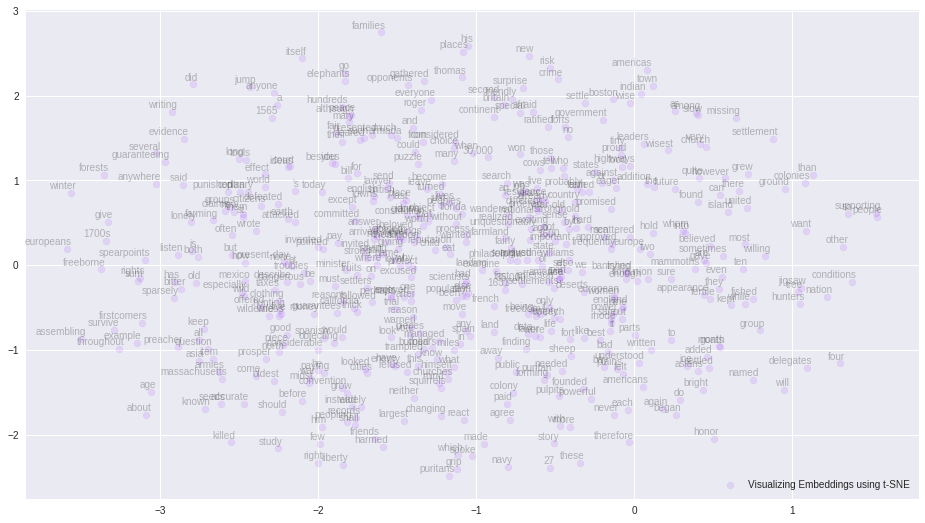

In [42]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Visualizing Embeddings using t-SNE', vector_embedded_2d, word_set, a=0.1)

In [0]:
vector_embedded_3d = TSNE(n_components=3).fit_transform(vectors)
vector_embedded_3d.shape

(487, 3)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


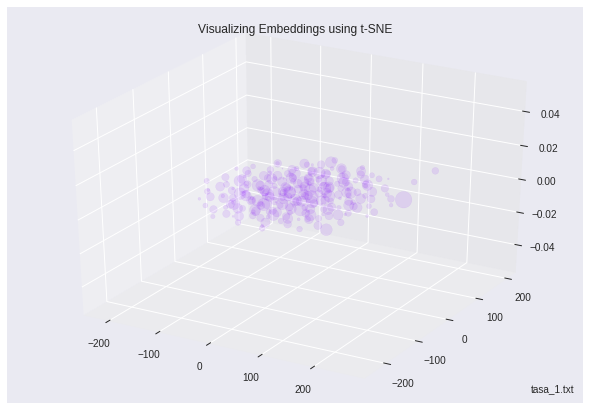

In [0]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'tasa_1.txt', vector_embedded_3d, a=0.1)

**Remove stop words**

In [0]:
# import nltk
# nltk.download('stopwords')

In [0]:
# stopwords = nltk.corpus.stopwords.words('english')
# cleaned_words = []

# for word in words:
#     if word not in stopwords:
#         cleaned_words.append(word)